In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Iris.csv')

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


from above data we can remove ID column and as all parameter in cm so we dont need to data scaling, only need to take care of species column

In [5]:
# to check missing value

data.isnull().mean()*100

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [6]:
# analyse the target columns

data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# removing ID column

x = data.iloc[:, 1:5]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = data['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
y.ndim

1

In [10]:
# converting species int using label encoding, convert categorical data into numerical data
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [11]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


22, 15, 65, 11, 42 index in below x_train set, this value changes if the random_state value is changed, without ranon_state in above code, everytime x_train value will get change


In [13]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [14]:
# KNN Algorithm

data.describe() # to check outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


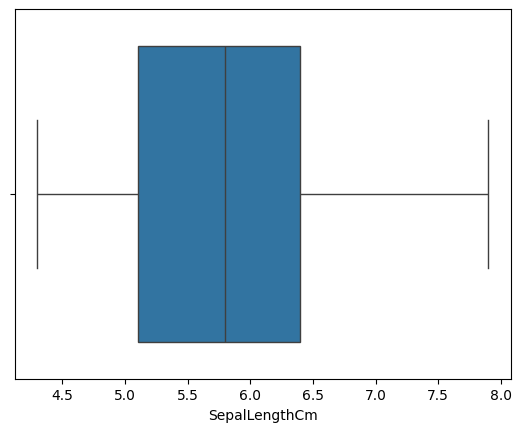

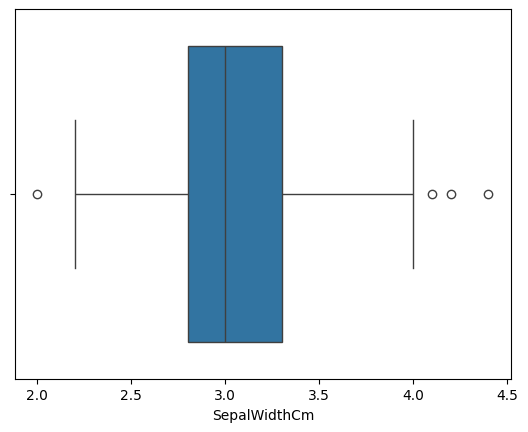

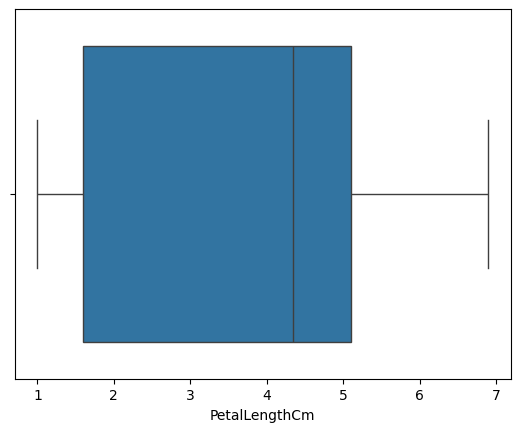

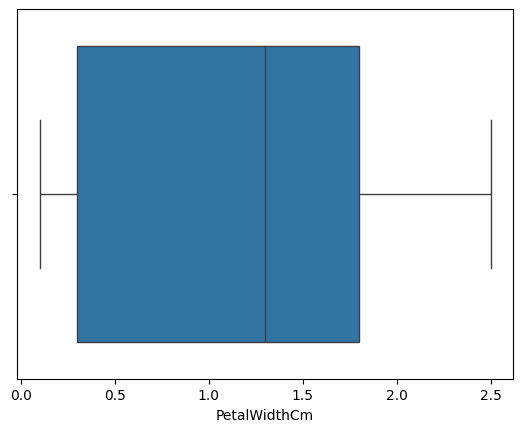

In [15]:
# can boxplot also to check outliers

for cols in x:
  sns.boxplot(x[cols], orient='h')
  plt.show()

In [16]:
# outlier treatment
Q1 = x['SepalWidthCm'].quantile(0.25)
Q3 = x['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1
lf = Q1 - 1.5*IQR
uf = Q3 + 1.5*IQR

x['SepalWidthCm'] = np.where(x['SepalWidthCm'] < lf, lf, x['SepalWidthCm'])
x['SepalWidthCm'] = np.where(x['SepalWidthCm'] > uf, uf, x['SepalWidthCm'])

In [17]:
print(Q1, Q3, IQR, lf, uf)

2.8 3.3 0.5 2.05 4.05


In [18]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [19]:
# Data Scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

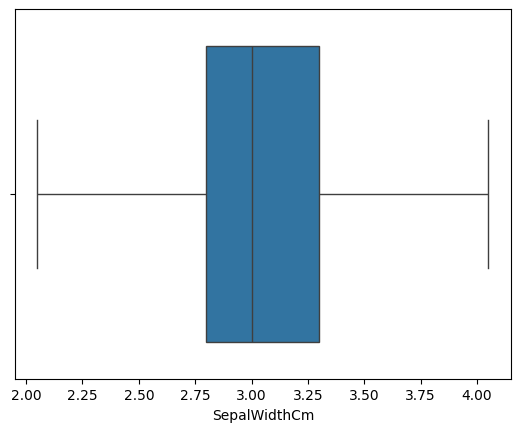

In [20]:
sns.boxplot(x['SepalWidthCm'], orient='h')
plt.show()

In [21]:
# KNN Algo

from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

In [22]:
error

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.0, 0.0]

In [23]:
# entire data

print(data['SepalWidthCm'].mean())
print(data['SepalWidthCm'].std())

# apply scaling before split it is called data leak

3.0540000000000003
0.4335943113621737


In [24]:
# x_train

print(x_train['SepalWidthCm'].mean())
print(x_train['SepalWidthCm'].std())

3.0533333333333332
0.433557365057403


In [25]:
# x_test

print(x_test['SepalWidthCm'].mean())
print(x_test['SepalWidthCm'].std())

3.0399999999999996
0.38470768123342686


In [26]:
# KNN Algo

from sklearn.neighbors import KNeighborsClassifier

error = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled, y_train)
  pred_i = knn.predict(x_test_scaled)
  error.append(np.mean(pred_i != y_test))

In [27]:
error

[0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.0,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333]

In [28]:
# crossvalidation

print(data['SepalLengthCm'].mean())
print(data['SepalLengthCm'].std())

5.843333333333334
0.828066127977863


In [29]:
# x_train

print(x_train['SepalLengthCm'].mean())
print(x_train['SepalLengthCm'].std())

5.809166666666666
0.82380505090996


In [30]:
# x_test

print(x_test['SepalLengthCm'].mean())
print(x_test['SepalLengthCm'].std())

5.98
0.8450260146985071
